In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [4]:
def read_data_from_folders(folders, files, file_begin, curent_path):
    data = {}
    
    for file in files:
        data[file] = {}
        for folder in folders:
            file_path = os.path.join(curent_path+"/"+folder, file_begin + folder + file)
            # Read the series from the CSV file
            try:
                # Read CSV - assumes the file contains a pd.Series with feature names as index and importances as values
                series = pd.read_csv(file_path, index_col=0)
                series = series['0']/series['0'].sum() 
                data[file][folder] = series
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
    
    return data

In [ ]:
def plot_feature_importances(data, files, folders):
    fig, axs = plt.subplots(2, 2, figsize=(18, 14))
    # axs = axs.flatten()  # Flatten for easier indexing
    plt.style.use('seaborn-v0_8-white')
    sns.set(font='serif')
    # sns.set_context("talk")
    # Colors for different folders
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    sorted_idx  = []
    all_features = []
    data_pd = pd.DataFrame()
    # Plot each variable
    

    for i, file in enumerate(files):
        importances_l = []
        features_l = []
        folder_l = []
        # ax = axs[i]
        row = i // 2
        col = i % 2
        # Get all features (assuming they're the same across folders)
        # all_features = set()
        # for folder in folders:
        #     if folder in data[file]:
        #         all_features.update(data[file][folder].index)
        
        # all_features = list(all_features)
        
        # Set up the x-positions for the bars
        # x = np.arange(len(all_features))
        # width = 0.8 / len(folders)  # Width of each bar
        
        # Plot bars for each folder
        for j, folder in enumerate(folders):
            if folder in data[file]:
                if j == 0:
                    sorted_idx = np.argsort(np.array(data[file][folder]))
                    all_features = np.array(data[file][folder].index)
                    all_features = all_features[sorted_idx]
                # Get importances for each feature (use 0 if feature not present)
                importances = [data[file][folder].get(feature, 0) for feature in all_features]
                importances_l.extend(importances)
                features_l.extend(all_features)
                folder_l.extend([folder] * len(all_features))
                # Calculate the position offset for this folder's bars
                # offset = width * j - width * (len(folders) - 1) / 2
                
                # Plot the bars
                # sns.barplot(y= x + offset, x= importances, width = width, label=folder, color=colors[j % len(colors)], ax=ax)
                
        data_pd_tmp = pd.DataFrame({
            'importances': importances_l,
            'feature': features_l,
            'folder': folder_l
        })
        sns.barplot(data=data_pd_tmp, x='importances', y='feature', hue='folder', palette=["blue", "red", "green"], ax=axs[row, col])
        
        # Set title and labels
        target = file.replace(".csv", "")[1:]
        if target == 'c_delta_z':
            axs[row, col].set_title(f'$\Delta_z$', fontsize=36)
        elif target == 'c_delta_y':
            axs[row, col].set_title(f'$\Delta_y$', fontsize=36)
        elif target == 'c_std_z':
            axs[row, col].set_title(f'$\sigma_z$', fontsize=36)
        elif target == 'c_std_y':
            axs[row, col].set_title(f'$\sigma_y$', fontsize=36)
        else: 
            axs[row, col].set_title(f'{target}')
        # axs[row, col].set_title(f'{file.replace(".csv", "")[1:]}', fontsize=32)
        axs[row, col].set_xlabel('Значимость', fontsize=32)
        axs[row, col].set_ylabel('Признаки', fontsize=32)
        axs[row, col].tick_params(labelsize=32)
        # axs[row, col].set_yticklabels(all_features, rotation=-45, ha='right')
        
        # Only add legend to the first subplot to avoid redundancy
        if i == 0:
            axs[row, col].legend(fontsize=32)
        else:
            axs[row, col].legend_.remove() 
    axs[0, 0].set(xlabel=None)
    # axs[0, 0].set_yticks(rotation=-45)
    # axs[1, 0].set_yticks(rotation=-45)

    axs[0, 1].set(xlabel=None, ylabel=None)
    axs[1, 1].set(ylabel=None)

    plt.tight_layout(pad=1.2)
    plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
    plt.show()

In [6]:


# Function to read data from all folders


# List of folders and files
folders = ["cb", "ann", 'rf']  # Replace with your folder names
curent_path = os.getcwd()
file_begin = "feature_importance_"
files = ["_c_delta_z.csv", "_c_delta_y.csv", "_c_std_z.csv", "_c_std_y.csv"]

# Read data from all folders
data = read_data_from_folders(folders, files,file_begin, curent_path)

# Create a figure with 4 subplots (2x2 grid)
# 

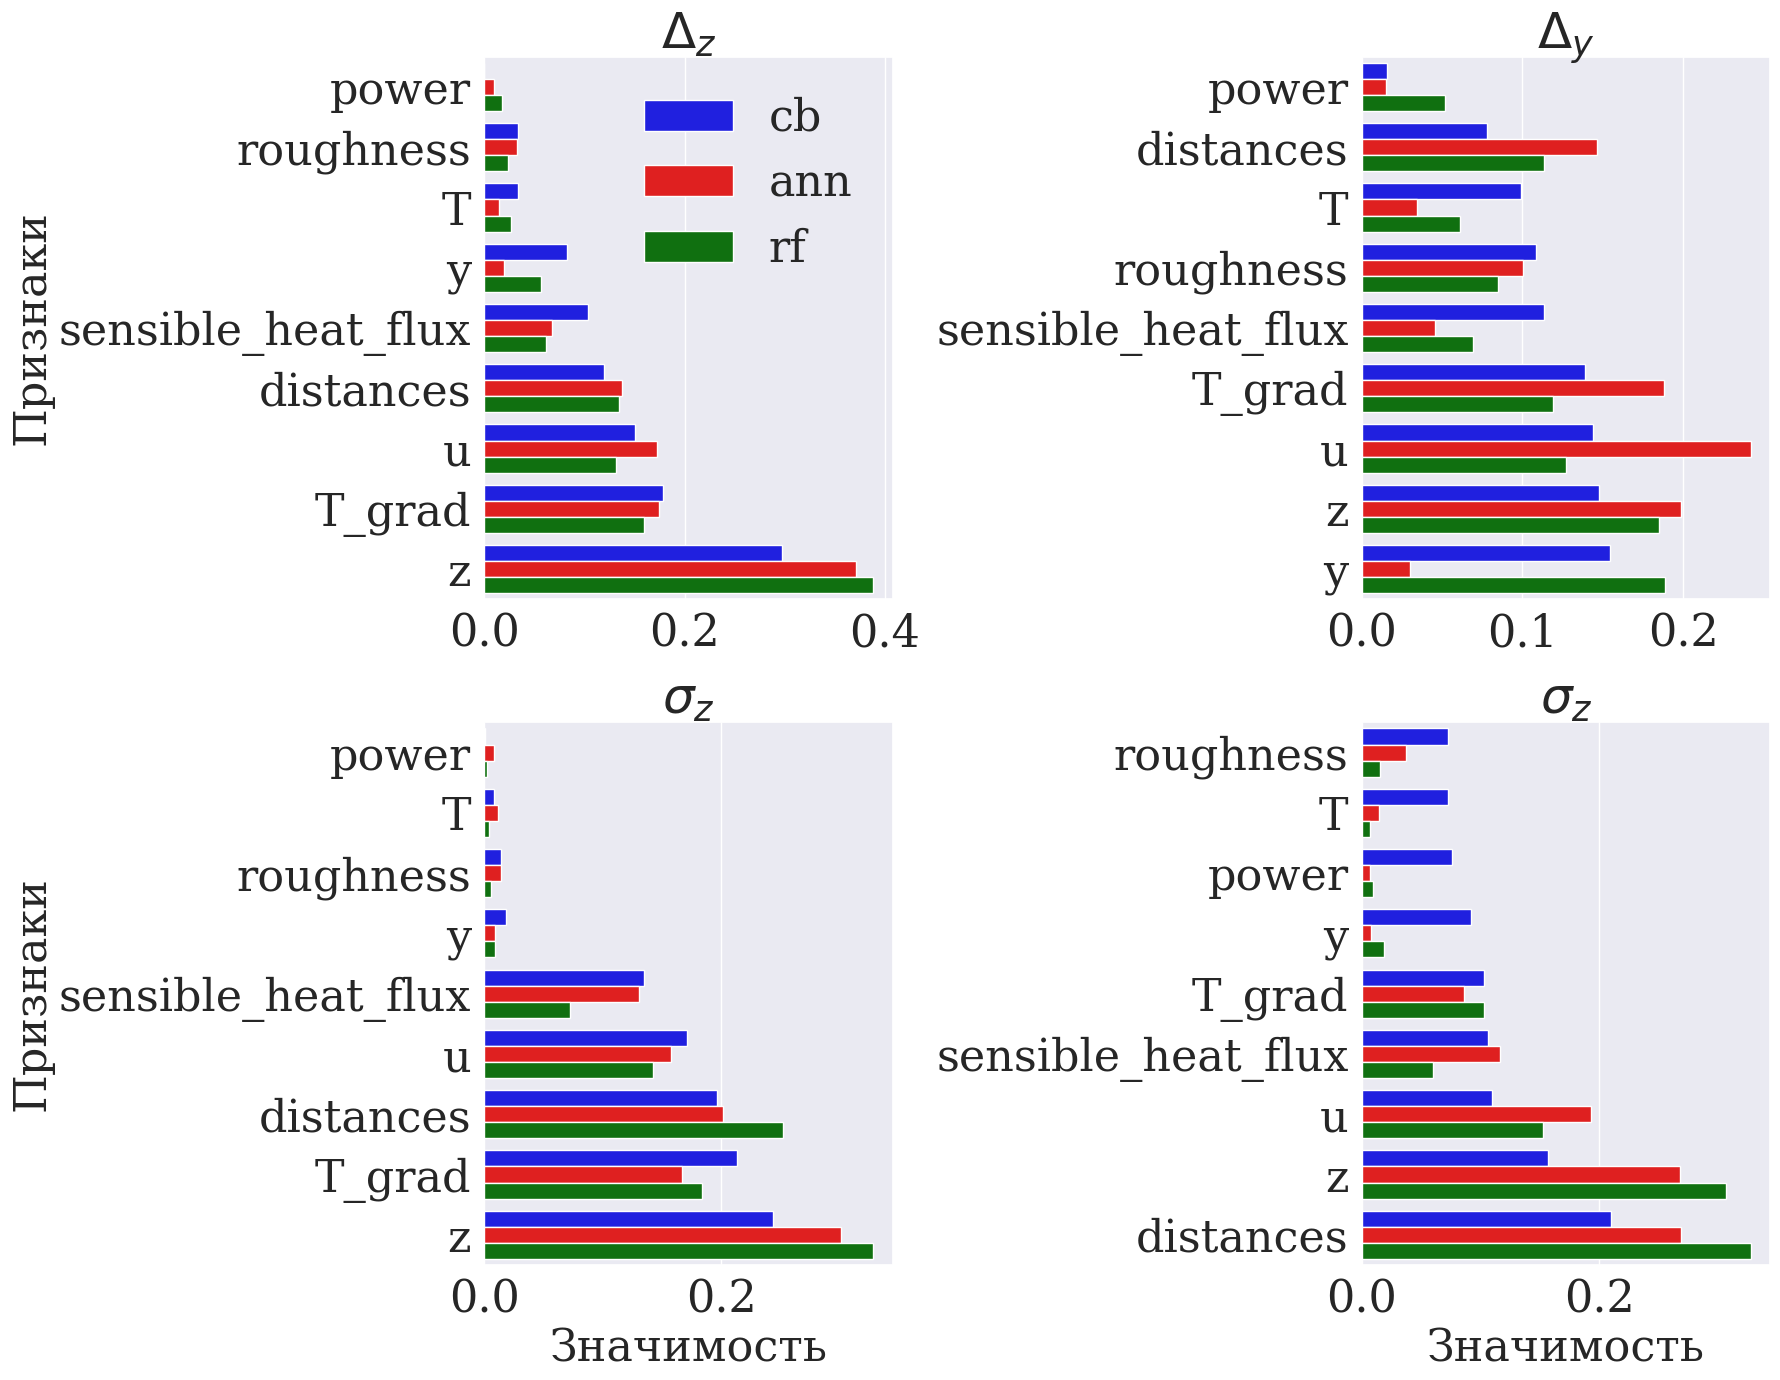

In [23]:
plot_feature_importances(data, files, folders)